In [129]:
#Individaul Acc.


#'Aanand_19_01.csv'  ,         88%
#'Abhijeet_6205876348.csv'     98%
#,'Aanand_19_02.csv'           95%
#'Deepanshu_21_1.csv',         86%
#'Achal_19_01.csv',            99%
#'Adit_18_02.csv',             93%
#'Deepanshu_21_02.csv',        98%
#'Mantavya_20_01.csv',         84.41%
# 'Mantavya_20_02.csv',        74%
# 'Pritesh_22_01.csv',         84%
#'Pritesh_22_02.csv',          83%
#'Rishab_20_01.csv',           86%
#'Rishab_20_02.csv'            84%

#mean: 88.61 % 


In [130]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path = r'Abhijeet_6205876348.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

timestamps            Fp1            Fp2             C3             C4  \
0  1.709303e+09 -243099.226725 -243044.643765 -243260.695727 -243258.818180   
1  1.709303e+09 -486176.727554 -486067.159303 -486499.799669 -486495.910465   
2  1.709303e+09 -486163.987060 -486054.150588 -486486.522733 -486482.633529   
3  1.709303e+09 -486211.059834 -486101.491583 -486533.997838 -486529.706303   
4  1.709303e+09 -486162.377734 -486052.138931 -486485.181628 -486480.890093   

              P7             P8             O1             O2             F7  \
0 -243220.596697 -243342.234891 -243561.371393 -243554.531760  -80190.817140   
1 -486418.931057 -486662.609775 -487101.016891 -487087.605844 -158660.192330   
2 -486406.056453 -486649.466950 -487087.739955 -487073.792466 -160461.430009   
3 -486453.129226 -486697.210276 -487134.678618 -487121.267572 -158937.130444   
4 -486404.044796 -486647.723514 -487086.130629 -487072.183141 -159526.411835   

              F8             F3             F4             T7             T8  \
0  -83768.616172  -89760.671825  -74204.528237  -89479.308066  -91012.458922   
1 -166178.693316 -177515.051069 -149363.788887 -178869.835004 -179131.618635   
2 -168741.544335 -180344.781917 -151113.796367 -181689.105235 -181896.574127   
3 -166303.281939 -177672.764978 -149560.528941 -179047.531372 -179304.352916   
4 -167597.179722 -179058.126099 -150247.576862 -180394.671010 -180632.046536   

              P3             P4  stim  sfreq  
0  -85809.911586  -95658.984263   0.0    125  
1 -168052.484757 -187120.042696   0.0    125  
2 -170508.852066 -186581.589172   0.0    125  
3 -168186.192892 -186893.932449   0.0    125  
4 -169386.749791 -186993.844747   0.0    125

In [131]:
temp = df.drop('stim', axis=1)

In [132]:
df = temp.drop('sfreq', axis=1)

In [133]:
df.head()

timestamps            Fp1            Fp2             C3             C4  \
0  1.709303e+09 -243099.226725 -243044.643765 -243260.695727 -243258.818180   
1  1.709303e+09 -486176.727554 -486067.159303 -486499.799669 -486495.910465   
2  1.709303e+09 -486163.987060 -486054.150588 -486486.522733 -486482.633529   
3  1.709303e+09 -486211.059834 -486101.491583 -486533.997838 -486529.706303   
4  1.709303e+09 -486162.377734 -486052.138931 -486485.181628 -486480.890093   

              P7             P8             O1             O2             F7  \
0 -243220.596697 -243342.234891 -243561.371393 -243554.531760  -80190.817140   
1 -486418.931057 -486662.609775 -487101.016891 -487087.605844 -158660.192330   
2 -486406.056453 -486649.466950 -487087.739955 -487073.792466 -160461.430009   
3 -486453.129226 -486697.210276 -487134.678618 -487121.267572 -158937.130444   
4 -486404.044796 -486647.723514 -487086.130629 -487072.183141 -159526.411835   

              F8             F3             F4             T7             T8  \
0  -83768.616172  -89760.671825  -74204.528237  -89479.308066  -91012.458922   
1 -166178.693316 -177515.051069 -149363.788887 -178869.835004 -179131.618635   
2 -168741.544335 -180344.781917 -151113.796367 -181689.105235 -181896.574127   
3 -166303.281939 -177672.764978 -149560.528941 -179047.531372 -179304.352916   
4 -167597.179722 -179058.126099 -150247.576862 -180394.671010 -180632.046536   

              P3             P4  
0  -85809.911586  -95658.984263  
1 -168052.484757 -187120.042696  
2 -170508.852066 -186581.589172  
3 -168186.192892 -186893.932449  
4 -169386.749791 -186993.844747

In [134]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=72467
    Range : 0 ... 72466 =      0.000 ...   603.883 secs


Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


<RawArray | 16 x 72467 (603.9 s), ~8.9 MB, data loaded>

In [135]:
# import mne
# from mne.channels import DigMontage

# # Define electrode positions
# positions = {
#     'Fp1': (-0.3268, 0.6235, 0.0351),  # Replace x_fp1, y_fp1, z_fp1 with actual coordinates
#     'Fp2': (0.3268, 0.6235, 0.0351),  # Replace x_fp2, y_fp2, z_fp2 with actual coordinates
#     'F7': (-0.873, 0.431, 0.032),  # Replace x_f7, y_f7, z_f7 with actual coordinates
#     'F3': (-0.514, 0.474, 0.034),  # Replace x_f3, y_f3, z_f3 with actual coordinates
#     'Fz': (0, 0.55, 0.035),  # Replace x_fz, y_fz, z_fz with actual coordinates
#     'F4': (0.514, 0.474, 0.034),  # Replace x_f4, y_f4, z_f4 with actual coordinates
#     'F8': (0.873, 0.431, 0.032),  # Replace x_f8, y_f8, z_f8 with actual coordinates
#     'T7': (-0.973, -0.041, 0.031),  # Replace x_t7, y_t7, z_t7 with actual coordinates
#     'C3': (-0.327, -0.103, 0.031),  # Replace x_c3, y_c3, z_c3 with actual coordinates
#     'Cz': (0, 0, 0.034),  # Replace x_cz, y_cz, z_cz with actual coordinates
#     'C4': (0.327, -0.103, 0.031),  # Replace x_c4, y_c4, z_c4 with actual coordinates
#     'T8': (0.973, -0.041, 0.031),  # Replace x_t8, y_t8, z_t8 with actual coordinates
#     'P7': (-0.7, -0.685, 0.032),  # Replace x_p7, y_p7, z_p7 with actual coordinates
#     'P3': (-0.273, -0.796, 0.034),  # Replace x_p3, y_p3, z_p3 with actual coordinates
#     'Pz': (0, -0.847, 0.034),  # Replace x_pz, y_pz, z_pz with actual coordinates
#     'P4': (0.273, -0.796, 0.034),  # Replace x_p4, y_p4, z_p4 with actual coordinates
#     # Add coordinates for other electrodes
# }

montage = 'standard_1020'
raw.set_montage(montage)


<RawArray | 16 x 72467 (603.9 s), ~8.9 MB, data loaded>

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


Fitting ICA took 40.1s.
Creating RawArray with float64 data, n_channels=16, n_times=72467
    Range : 0 ... 72466 =      0.000 ...   603.883 secs
Ready.


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1291946124.py:7: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (15) and smallest (1e-26) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)


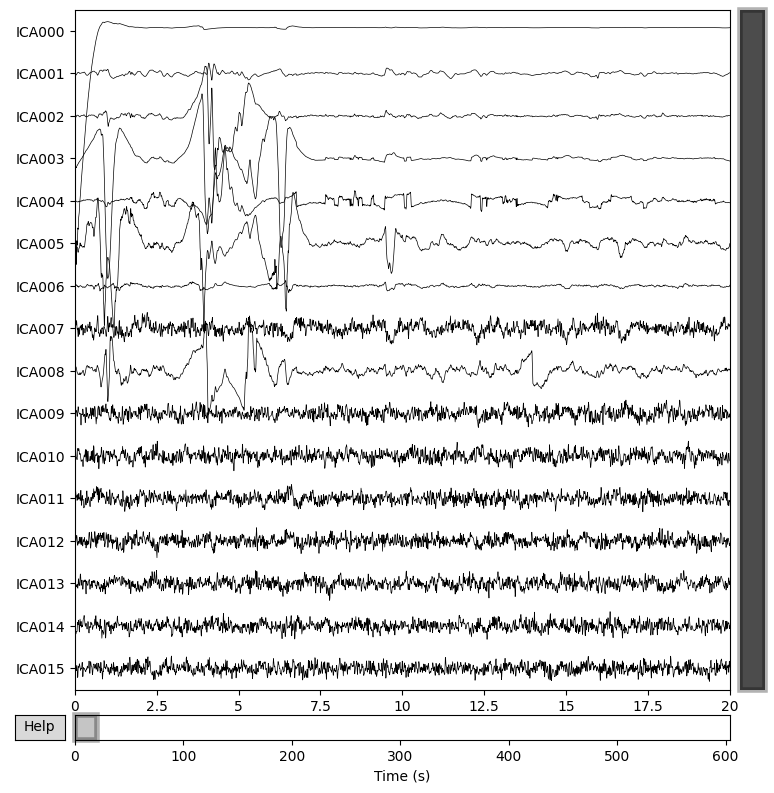

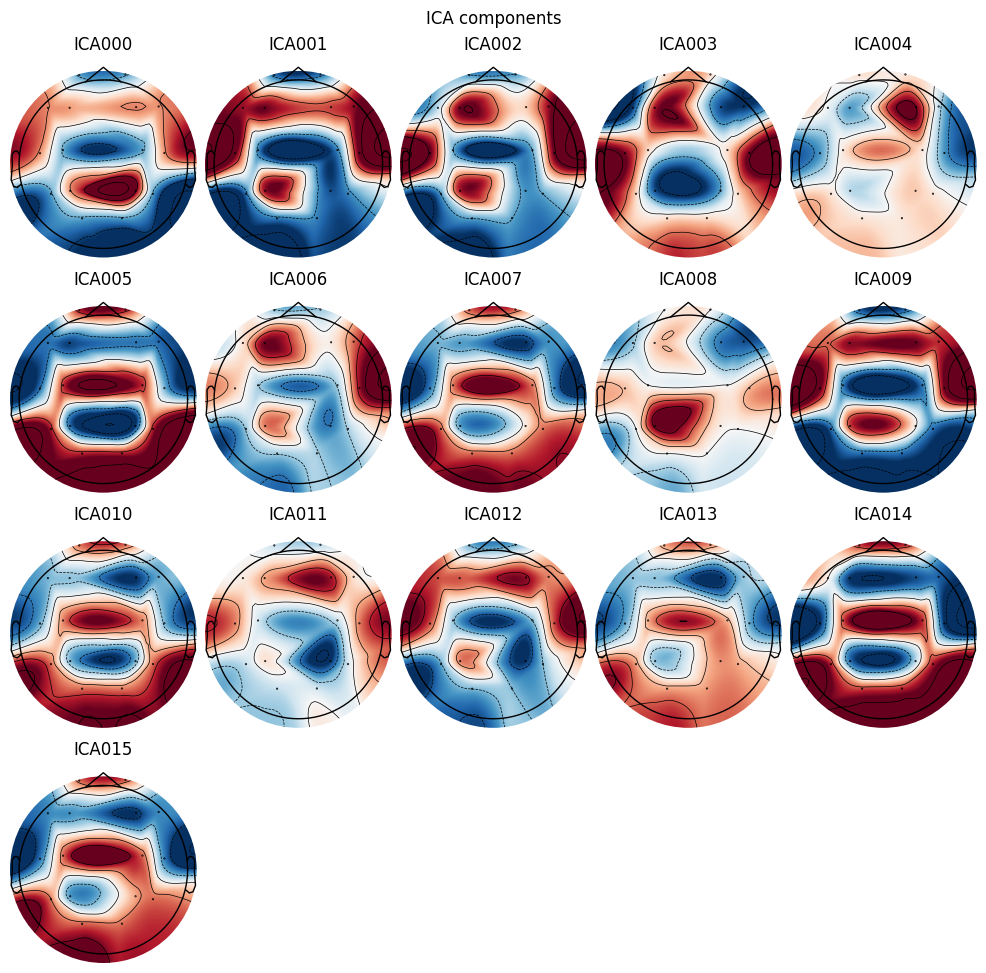

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
301 matching events found
No baseline correction applied
0 pro

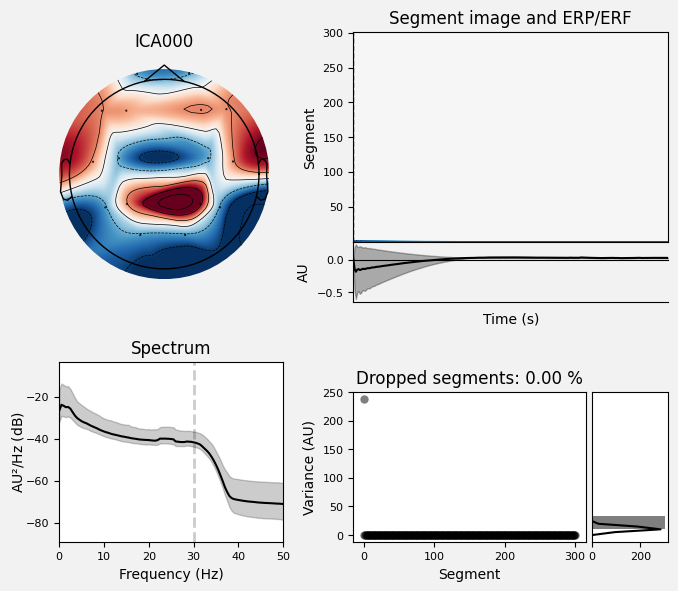

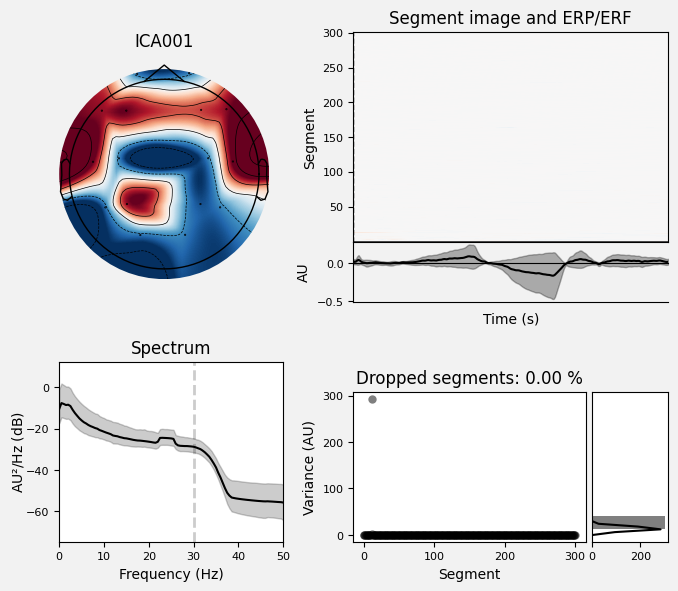

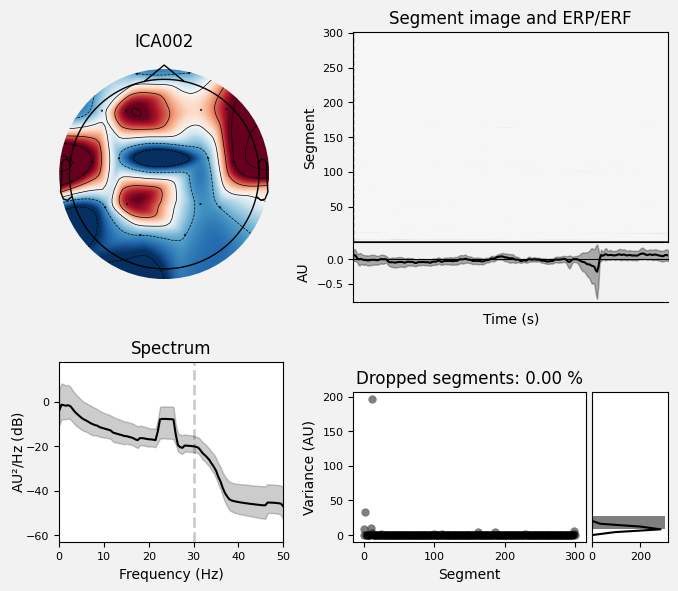

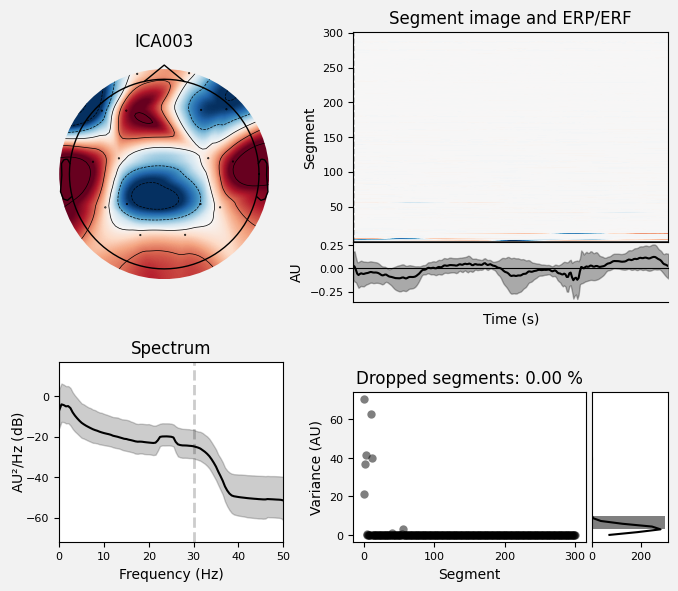

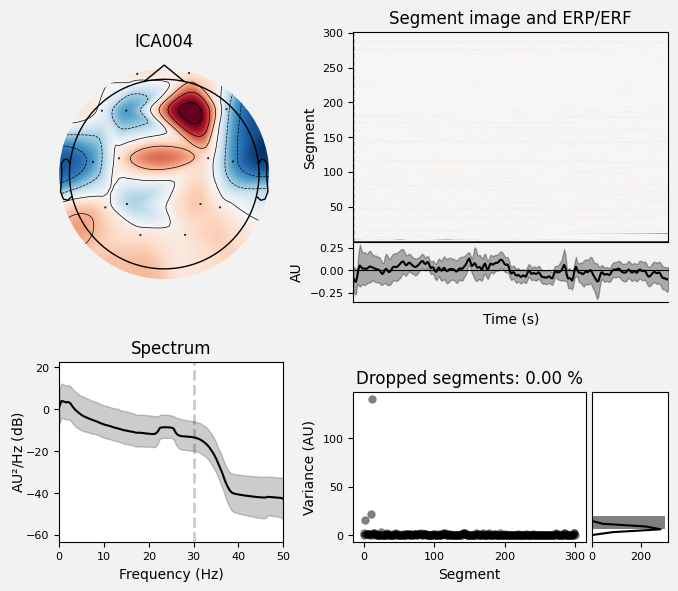

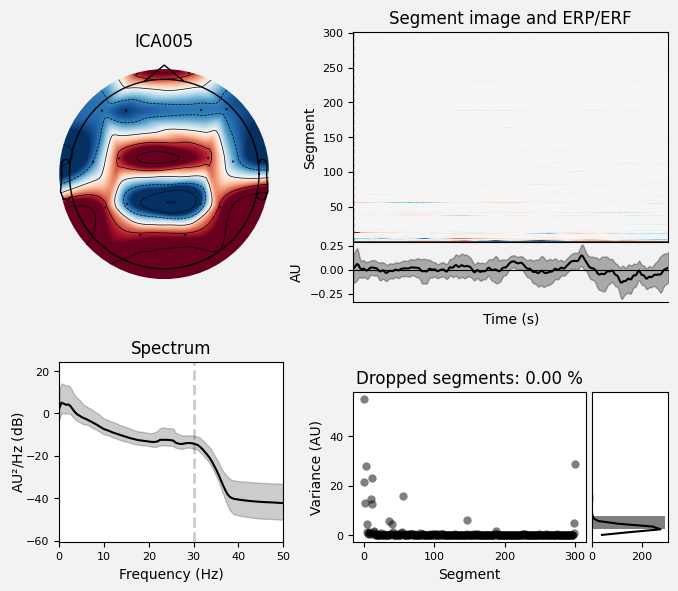

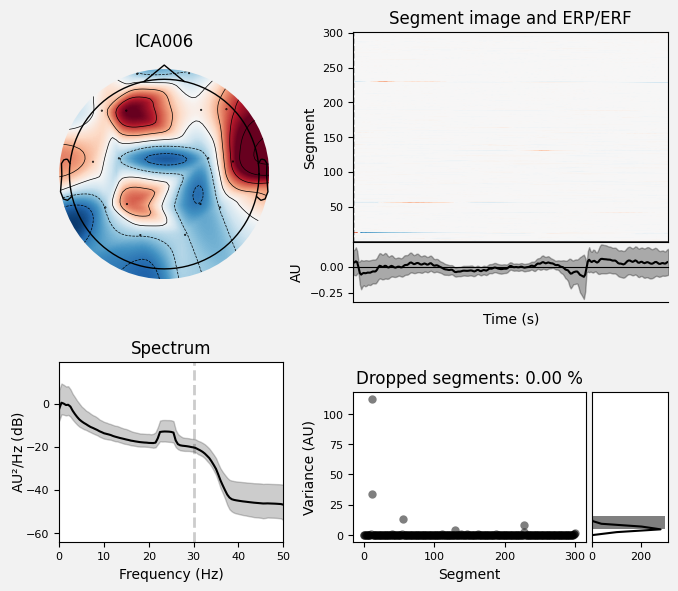

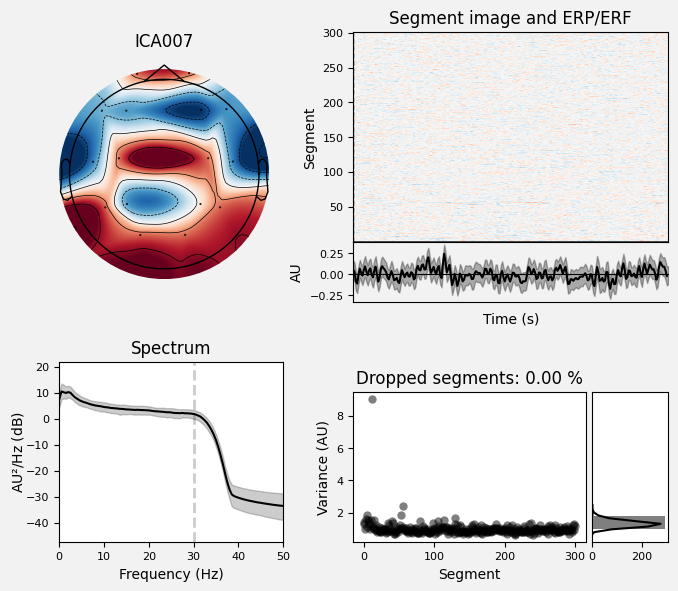

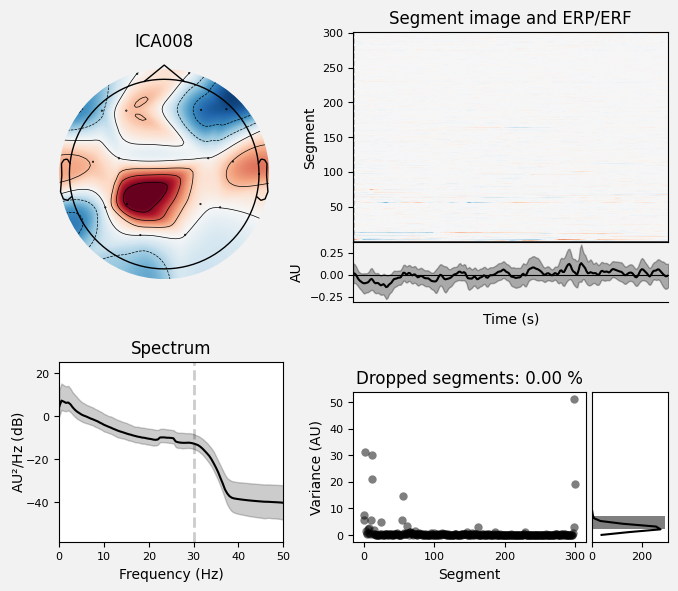

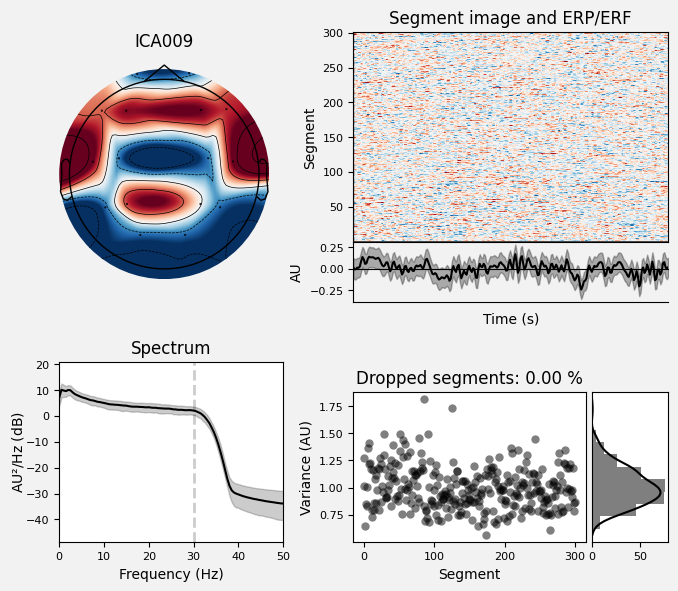

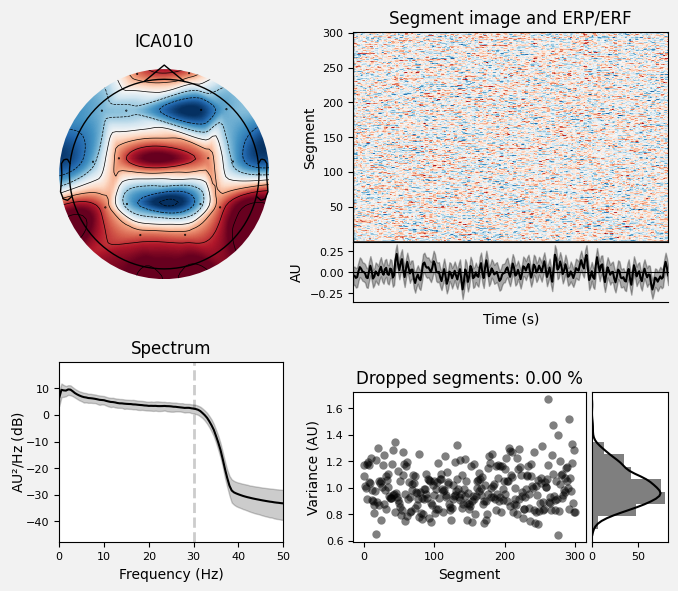

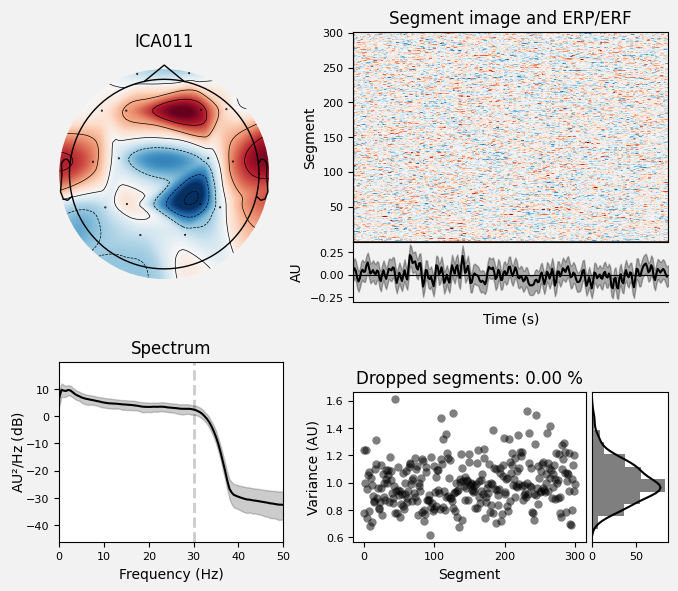

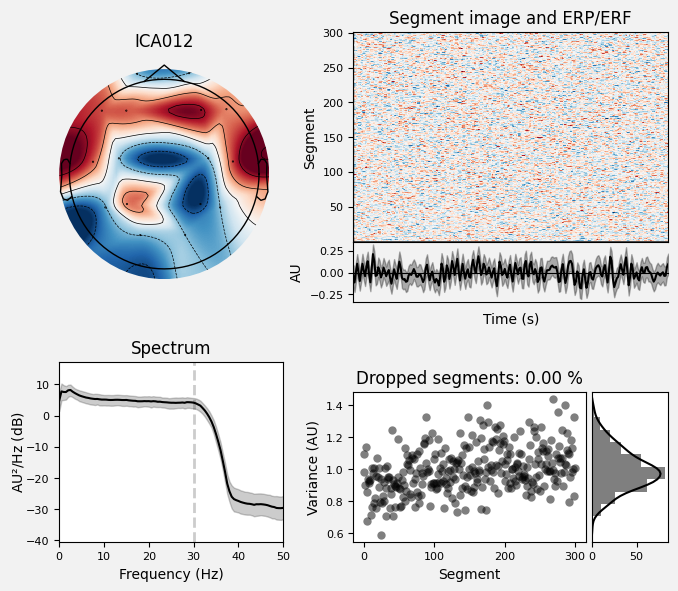

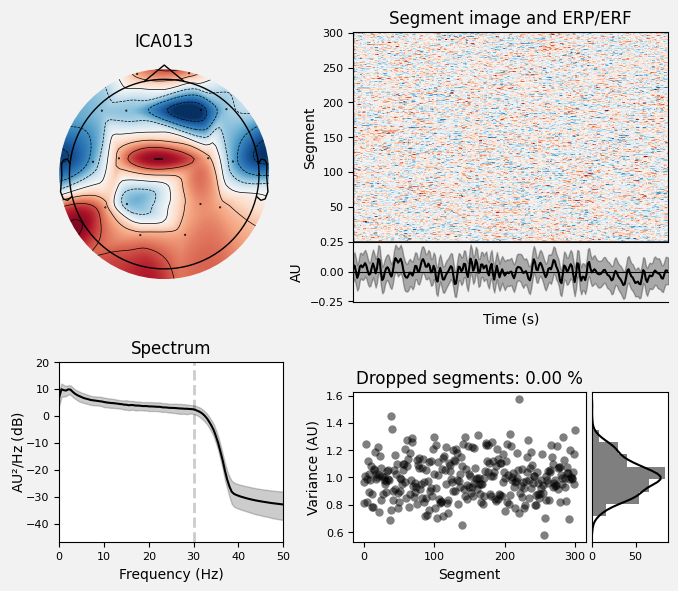

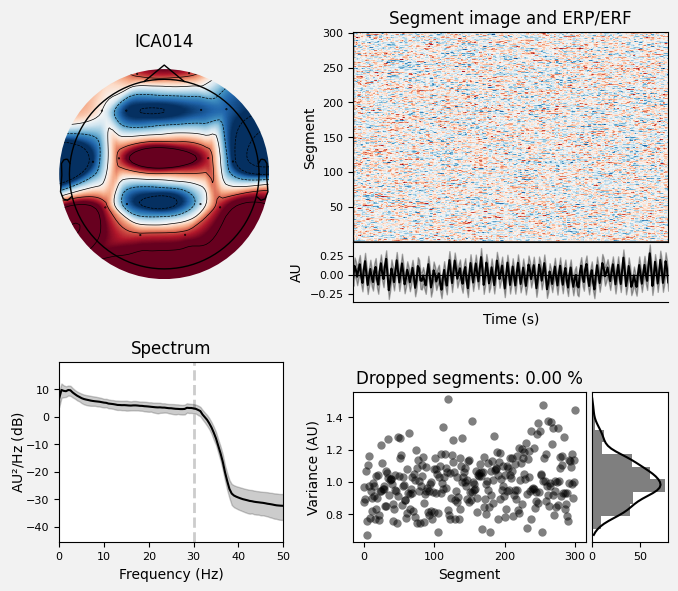

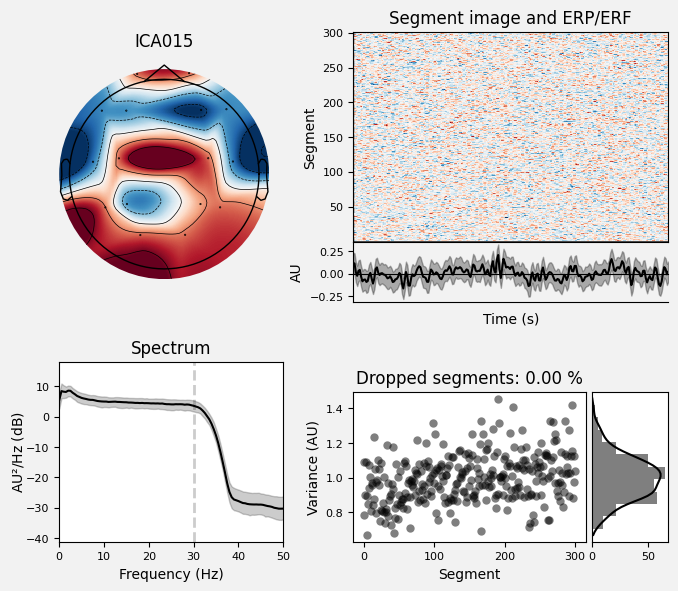

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components


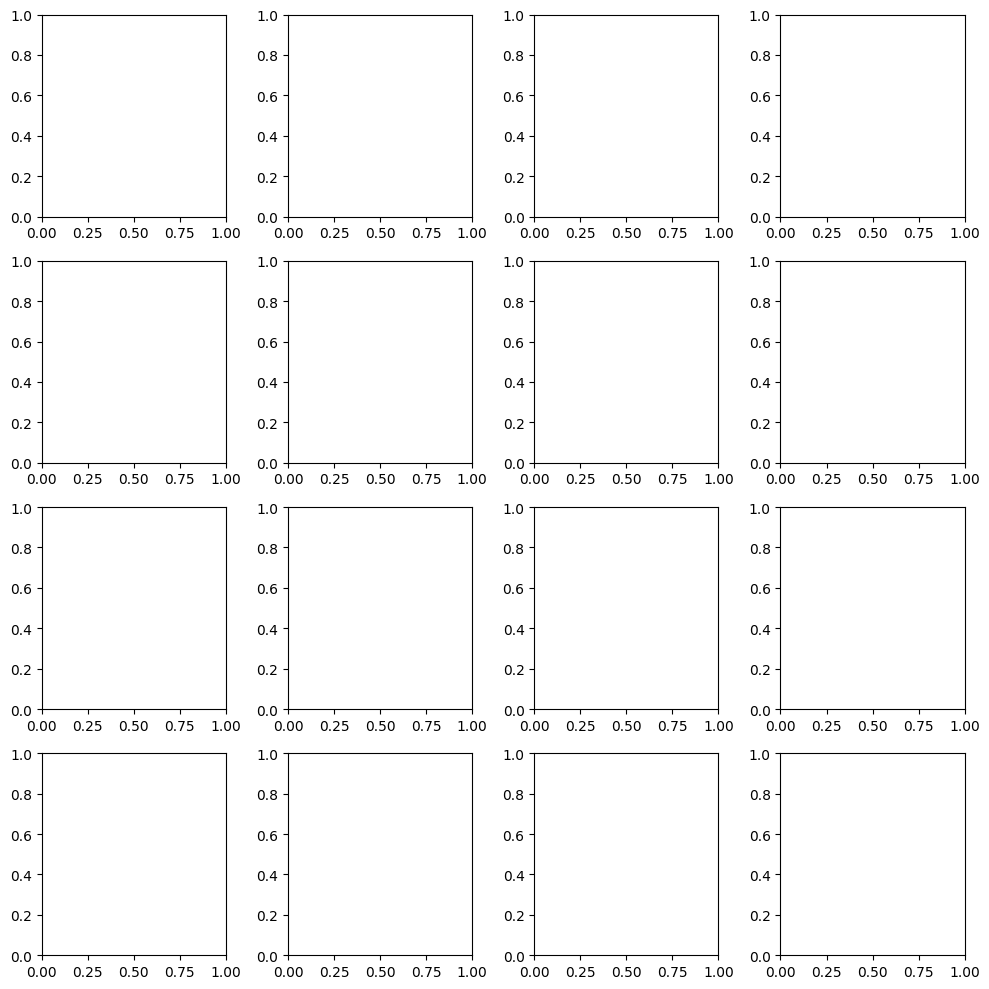

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne

ica = ICA(n_components=16, random_state=97)
ica.fit(raw)

ica.plot_sources(inst=raw, picks=np.arange(16), show=True)

ica.plot_components(inst=raw, picks=np.arange(16), show=True)

ica.plot_properties(inst=raw, picks=np.arange(16), psd_args={'fmax': 50}, show=True)

plt.show()

raw_ica = ica.apply(raw)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

plt.tight_layout()
plt.show()


In [137]:
duration = 0.5

epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)

Not setting metadata
1207 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1207 events and 60 original time points ...
0 bad epochs dropped


In [138]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)

Total number of epochs created: 1207


In [139]:
epochs.get_data()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1251544707.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


array([[[ 2.76285656e-04,  1.09036792e+06,  1.38785235e+06, ...,
          2.55077337e+05,  2.43308560e+05,  2.31579696e+05],
        [ 9.19905619e-05,  1.08966215e+06,  1.38695179e+06, ...,
          2.54912127e+05,  2.43152083e+05,  2.31429607e+05],
        [ 4.50872293e-04,  1.09243881e+06,  1.39049002e+06, ...,
          2.55562489e+05,  2.43777479e+05,  2.32026776e+05],
        ...,
        [ 1.94145532e-04, -8.84887211e+05, -1.12574072e+06, ...,
         -1.94440102e+05, -1.84447532e+05, -1.74360553e+05],
        [ 8.81840191e-04, -9.62108478e+05, -1.22450757e+06, ...,
         -2.31332677e+05, -2.21091347e+05, -2.10773865e+05],
        [-4.78986186e-03, -2.10831088e+06, -2.68547071e+06, ...,
         -5.00492657e+05, -4.78305831e+05, -4.56737436e+05]],

       [[ 2.19994411e+05,  2.08765432e+05,  1.97851996e+05, ...,
         -5.14150165e+04, -5.08362896e+04, -4.97532592e+04],
        [ 2.19850834e+05,  2.08628538e+05,  1.97721376e+05, ...,
         -5.13837130e+04, -5.08025568e

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '


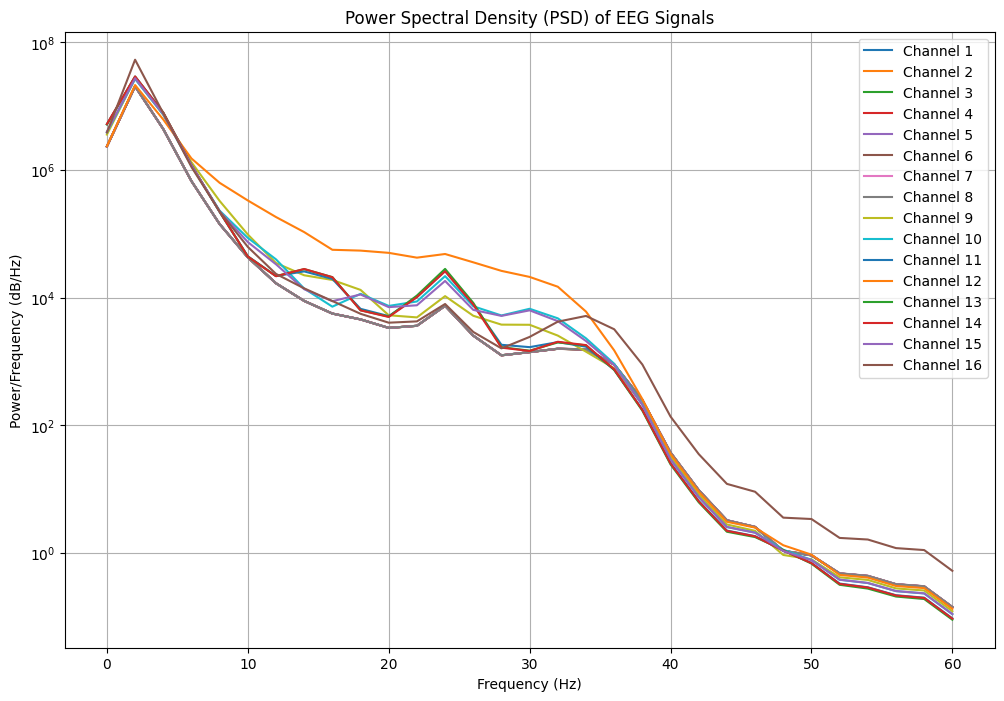

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

data = epochs.get_data(copy=True)
sfreq = epochs.info['sfreq']
n_epochs, n_channels, n_time_points = data.shape

plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
    
    avg_psd = np.mean(psd, axis=0)
    
    plt.semilogy(freqs, avg_psd, label=f'Channel {channel_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


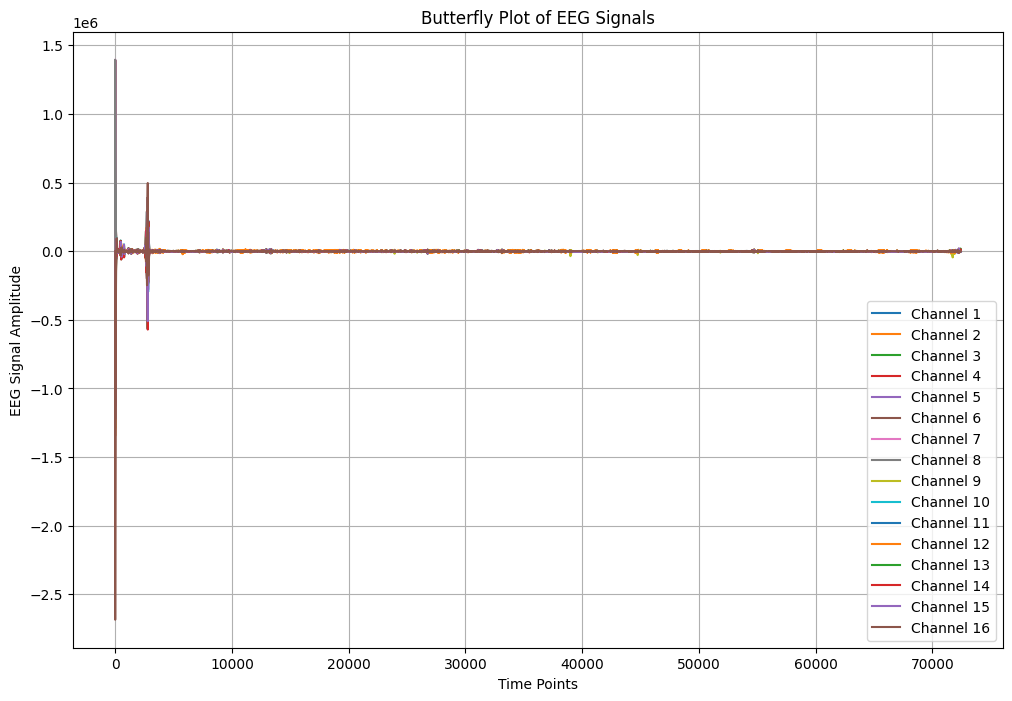

In [141]:
data = epochs.get_data(copy=True) 
n_epochs, n_channels, n_time_points = data.shape
plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    channel_data = data[:, channel_idx, :].flatten()
    time_points = np.arange(n_time_points * n_epochs)
    plt.plot(time_points, channel_data, label=f'Channel {channel_idx + 1}')


plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('Butterfly Plot of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


In [142]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Not setting metadata
603 matching events found
No baseline correction applied
Number of epochs for lev1: 201
Number of epochs for lev2: 201
Number of epochs for lev3: 201
Total number of selected epochs: 603


C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\776002152.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


In [143]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (201, 16, 60)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [144]:
condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]

In [145]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (603, 49)
         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   581.8907027373724   591.300563488072  597.2349261740941   
1  431.46184795739697  429.5868328801598  437.2498073084103   
2   446.4949029449799  471.7680265032857   446.179948010937   
3    603.868551337786  598.4121859265799   609.152063188839   
4     454.97925604371  466.1938325973805  488.1351499688151   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0   589.8067212014776  592.1736784025201   590.5349566274208   
1  435.84804359875164  445.5301211984678   431.9280879991757   
2  452.08990553920216  475.1703996824959   463.8561233993792   
3   607.8093324223269  601.3706819818802   610.8497994836238   
4   472.8718663885636  481.7957353730642  476.41646690200247   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    589.242995111354   608.9995624444211   422.7412738757703   
1  436.51427512516517   425.5934288042878    370.767180175618   
2  

In [146]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   581.8907027373724   591.300563488072  597.2349261740941   
1  431.46184795739697  429.5868328801598  437.2498073084103   
2   446.4949029449799  471.7680265032857   446.179948010937   
3    603.868551337786  598.4121859265799   609.152063188839   
4     454.97925604371  466.1938325973805  488.1351499688151   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0   589.8067212014776  592.1736784025201   590.5349566274208   
1  435.84804359875164  445.5301211984678   431.9280879991757   
2  452.08990553920216  475.1703996824959   463.8561233993792   
3   607.8093324223269  601.3706819818802   610.8497994836238   
4   472.8718663885636  481.7957353730642  476.41646690200247   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    589.242995111354   608.9995624444211   422.7412738757703   
1  436.51427512516517   425.5934288042878    370.767180175618   
2  455.78007785038426   474.5341313834254

In [147]:
feature_df

mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0     581.8907027373724    591.300563488072   597.2349261740941   
1    431.46184795739697   429.5868328801598   437.2498073084103   
2     446.4949029449799   471.7680265032857    446.179948010937   
3      603.868551337786   598.4121859265799    609.152063188839   
4       454.97925604371   466.1938325973805   488.1351499688151   
..                  ...                 ...                 ...   
598  1888.4520888827403  1855.3418929521758  1890.4769818827724   
599  1785.4597961826262  1808.7191475987613  1800.9098977831377   
600   2358.118652812344   2354.538115907564  2376.0886401199814   
601  2287.5266713576816  2279.5755607283036  2275.9594650075283   
602  2916.0744620433943  2896.8823130845526  2892.0524531098567   

            mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0     589.8067212014776   592.1736784025201   590.5349566274208   
1    435.84804359875164   445.5301211984678   431.9280879991757   
2    452.08990553920216   475.1703996824959   463.8561233993792   
3     607.8093324223269   601.3706819818802   610.8497994836238   
4     472.8718663885636   481.7957353730642  476.41646690200247   
..                  ...                 ...                 ...   
598  1892.5733206267114  1855.8722207774222  1871.8963967371394   
599  1822.5130661099656  1818.4662391798402  1822.3511812555653   
600   2372.287536226483  2357.4233442374475   2371.806683801895   
601  2280.3993129317064  2308.5363826506295  2238.4096363133026   
602  2894.3039840725255  2882.8299913503633   2911.942085642497   

            mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0      589.242995111354   608.9995624444211   422.7412738757703   
1    436.51427512516517   425.5934288042878    370.767180175618   
2    455.78007785038426   474.5341313834254   1278.966332429846   
3     599.2914399907179   597.0463097359911    744.031478856596   
4    461.73039368178473  477.14362707296937  162.58767689499894   
..                  ...                 ...                 ...   
598  1881.9481498962061  1855.4632072648103   3244.002553405744   
599  1816.5063159739818   1814.253773076046   2341.231737078455   
600   2361.179471538408   2383.554438971107  1754.5709587010817   
601  2294.4313356683797  2266.1066240153536  31024.636071955683   
602   2901.395500624485  2890.5277656391863  1943.3877779953518   

            mean_psd_F8  ...       stddev_psd_O2       stddev_psd_F7  \
0      931.929941632227  ...   598.5674612847715  327.02429873877924   
1     1125.252546045381  ...  282.95416990047295  295.51272689667314   
2     1077.953336706652  ...   491.0673142697449   1251.643106986233   
3    1036.5288270222704  ...   838.8163489978145   542.1633418877595   
4    1093.5679261431926  ...   381.1391044484221   91.43589986664576   
..                  ...  ...                 ...                 ...   
598   6692.997952674961  ...    3006.00475699455   3518.288911068457   
599   7404.082976869087  ...   3320.765562734917  3869.2032639405297   
600   7658.222730500866  ...   4182.628910673531    2841.55055340377   
601  7218.9687608841905  ...  3877.0867475977952  31744.839914314045   
602   7883.702457295415  ...   5138.596558617393   2456.204882707528   

          stddev_psd_F8  standarddev_psd_F3  standarddev_psd_F4  \
0     741.8880122504451   985.0811696817445   8105.113940996027   
1     930.2602464728025  1059.9949035372817   7700.984834891101   
2     882.4419662489686  1409.1740294144806   1156.997812570468   
3    1258.6654579738963  1737.8466926610263  1714.4326262244326   
4     791.4670807623592  1028.7008436782228   763.3386326784112   
..                  ...                 ...                 ...   
598  12203.904396723492  12738.244094792773  1743.7151385328675   
599  13764.411104282783  13356.845603278141  1285.9022016635768   
600   13999.71880666133  15448.612065461142  3758.0232010253467   
601  13204.412327431393  14817.443223360966  13213.6950367421

In [148]:
# import matplotlib.pyplot as plt

# def plot_psd_features(psd_features, freqs, ch_names):
#     num_channels = len(ch_names)
    
#     fig, axs = plt.subplots(num_channels, figsize=(10, 6*num_channels))
#     for i, (channel_psd, channel_name) in enumerate(zip(psd_features, ch_names)):
#         axs[i].plot(freqs, channel_psd, label=channel_name)
#         axs[i].set_title(f'Power Spectral Density (PSD) for Channel {channel_name}')
#         axs[i].set_xlabel('Frequency (Hz)')
#         axs[i].set_ylabel('PSD')
#         axs[i].grid(True)
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# psd_frequencies, psd_values = welch(epoch_data[0], fs=sfreq)

# # Example usage:
# plot_psd_features(psd_values,  psd_frequencies, ch_names


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9504132231404959


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5206611570247934


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9338842975206612


Not setting metadata
12077 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 12077 events and 6 original time points ...
0 bad epochs dropped
Not setting metadata
6003 matching events found
No baseline correction applied
Number of epochs for lev1: 2001
Number of epochs for lev2: 2001
Number of epochs for lev3: 2001
Total number of selected epochs: 6003
Epoch array shape for condition lev1: (2001, 16, 6)


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  w

Shape of feature DataFrame: (6003, 49)
         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0   554.5925022906156  557.3107200438316    550.104636199072   
1  393.02842304799015  365.9099194778802  366.27392796863796   
2   391.6637747977641  403.4668662765032   396.3409409909431   
3   753.0290693744676  740.9106269376628   762.3150522650944   
4   69.99784529401555  71.82116012723817    75.9802786296036   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0    541.213226764801   569.0904149658206   569.8870060871175   
1  366.31669616102477   374.8326402924046  363.40804017148406   
2   395.4913819792016  392.17216954623484   416.5686328913182   
3   746.0283776568078   735.0636835132377   753.9193707523153   
4   73.00735305867428   67.80831593380627   74.76434192551913   

          mean_psd_O1        mean_psd_O2         mean_psd_F7  \
0   536.2506424340398  551.7915988940198  172.97226034388598   
1  372.48194522401604  359.9767231514108   91.28586186347

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12

Shape of feature DataFrame: (3003, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  1629.5127554710987  1574.9352364638924  1622.8057421606238   
1  3687.6366550772022  3669.0117707662066  3667.3385320290054   
2    591.869498167928    624.726812615272   626.0098879732872   
3   794.2794827790339   776.3045156244369   800.9576786105727   
4   357.4669642869235   365.5279375007538   366.3370029545618   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  1548.1904200855652  1576.9229761538597  1569.8898845716096   
1  3647.5493277250303   3699.590163450584  3659.4831690181395   
2    617.708139530452   623.9869994387336   616.9592190700128   
3   784.9170827402554   766.6571109807002   785.3324324754531   
4   379.8268743262426  369.41380175580883   366.8446931455714   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   1626.694922376142  1605.3178006604703  1806.1046300680118   
1  3655.1510320910365   3625.584573845639   715.2

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24

Shape of feature DataFrame: (1503, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   416.3964766195894  403.25471122395504  389.42115638108316   
1  1656.2594478770377  1669.9251615813187  1654.1116433016955   
2   556.3264157011035   538.0458771462916   543.8910509514387   
3  1234.3278342367967  1263.8762499724157  1243.3970203916365   
4   1324.383255801256  1310.9680566852498  1331.0249159167581   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  390.14724881724794  400.62765435132536   406.0054647995442   
1  1649.7908682054772  1655.2784265072391  1644.0518618988979   
2   553.0587525930299     554.24018360926   536.3696878112667   
3  1246.2312684577425  1240.7237555631896  1233.0523640924898   
4  1327.2310035362625  1354.9432514036714   1314.087957999507   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  399.05395149828183  396.50509811494555   257.7919524293106   
1  1661.1324385732296   1640.173756313962  1751.5

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36

Number of epochs for lev1: 334
Number of epochs for lev2: 334
Number of epochs for lev3: 334
Total number of selected epochs: 1002
Epoch array shape for condition lev1: (334, 16, 36)
Shape of feature DataFrame: (1002, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  350.43942557127065  346.10948893838304   329.7678366874549   
1    543.405999936902   546.3596742077926   546.5420089722437   
2   418.7297231296207  432.98643468052643   422.9520936117728   
3   313.0632786781278  295.09252805457874    311.699890524141   
4  448.62400359854354   453.8562984345055  435.75063131876044   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  330.73965868702066   349.4617982405118  342.91274643845304   
1    549.440342736909   552.4290756389626   540.8723663582435   
2  428.03111000174613  426.19355321440895   425.6285849145651   
3  312.21254145566803  312.40379449289486   305.7822506666169   
4   440.0581780675934   469.6969608102547  456.54571708506364 

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48

Shape of feature DataFrame: (753, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   368.1651154493253   372.9477784015876   376.1032815119732   
1  401.61461652593334   397.6767573568093   403.3363042224022   
2  157.15756375220855  154.14899513740727   163.5815902288329   
3   958.3297679821993   978.6631674596433   964.3471724414187   
4   366.0217162785737   368.0140368209267  375.32151374735156   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   372.8824447618892   370.7004508970725  377.97965226165826   
1  406.53258322866054  401.31934746446507    394.996403789607   
2  163.48858123958058  160.02412470394918   159.7620149872273   
3   951.6180878569148   984.4084555812545   975.6839267331385   
4   372.0472726261544  367.00278471924923  371.05146470108986   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   373.6765675656293   385.7300591757605  456.13110534981473   
1   397.2164058231786  382.90812023822957   614.03

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60

Shape of feature DataFrame: (603, 49)
         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   581.8907027373724   591.300563488072  597.2349261740941   
1  431.46184795739697  429.5868328801598  437.2498073084103   
2   446.4949029449799  471.7680265032857   446.179948010937   
3    603.868551337786  598.4121859265799   609.152063188839   
4     454.97925604371  466.1938325973805  488.1351499688151   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0   589.8067212014776  592.1736784025201   590.5349566274208   
1  435.84804359875164  445.5301211984678   431.9280879991757   
2  452.08990553920216  475.1703996824959   463.8561233993792   
3   607.8093324223269  601.3706819818802   610.8497994836238   
4   472.8718663885636  481.7957353730642  476.41646690200247   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    589.242995111354   608.9995624444211   422.7412738757703   
1  436.51427512516517   425.5934288042878    370.767180175618   
2  

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72

Shape of feature DataFrame: (503, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  476.03116360299884     474.67745260275   462.0359888261708   
1  381.05657915102205  371.94672541104165   376.1155007420162   
2  217.03445180168865  229.44599710721477   228.2478250623396   
3   664.1168983819281   663.3751162971822   666.8342240534762   
4  405.76868180511445  415.27638133724815  432.75791003779864   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0  474.57940760574434  467.2945085674184    481.909567404723   
1  381.17141155523205  375.4641256030737  366.24874113748024   
2  233.08305990846355  225.5154310804626   221.1605256909329   
3   669.0179556918991  663.2316275471694   671.3850185180505   
4   422.3799359299546  425.2191523284095  424.44193111925665   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   461.3183478873477   463.3019694333482   421.6741244286099   
1   374.1432797550451   368.6373331421293   402.02210932

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84

Shape of feature DataFrame: (430, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   375.1754617862526   384.9824276313311  378.56640543468853   
1  448.86169020759706   444.0584034516872  448.68493085486693   
2  281.77116799468325  297.93852977720525  289.23615116202797   
3   498.3375886100429    496.670567847078   502.4693627959425   
4  407.58563553046247   403.3156332934632  398.34542403828044   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0    379.416364377694   380.8870902889742  388.42038032726947   
1   451.9129484692496  448.45259110646987   438.4815702307174   
2   294.6227707507332  296.44855994122815  290.12495441553307   
3   500.8644937427352   489.7808812146567   496.2446816490957   
4  411.14933815472153  394.43806298320266  412.51372500205434   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   373.7721647681464   379.8588563031272   374.6706105994955   
1   445.4729480291931   444.0126369397734  416.692

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96

Shape of feature DataFrame: (378, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  435.68554938569207   433.9685016704952  437.47919712260375   
1  378.44035095402967   400.1445323926634  384.80876105619626   
2  416.56854719674055  420.32235358283526  426.08886039576157   
3   663.8992671905463   656.3284872281172   651.5349350219179   
4   412.2656279948115  406.80764545112106   430.1547908461242   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  438.58662997559975  436.13635884710385   428.5899618515486   
1   389.8763918979747  398.78826610489665  390.16844843755973   
2  426.51777572860203   413.0659549804086  413.26145441092615   
3   643.7830657659975   655.1359572552658   651.9996700131935   
4   405.0902850830968   423.2164443602537   406.7924616487191   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  435.79343625901214   441.8790978619772  377.92475411824626   
1   388.6684017575754  400.14451504361557   955.90

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 108
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


Not setting metadata
336 matching events found
No baseline correction applied
Number of epochs for lev1: 112
Number of epochs for lev2: 112
Number of epochs for lev3: 112
Total number of selected epochs: 336
Epoch array shape for condition lev1: (112, 16, 108)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 108
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (336, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   471.8469249679462   473.1897583749841   477.0415510564606   
1   491.0665375445504   512.8857421385911   495.6267760863074   
2   360.4747086670951  367.96313673496616  380.30092412168847   
3   655.6383753520985   648.8816082021017   650.5378017300263   
4  231.27943378495254   233.3088454939633  232.41528677512522   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   475.7554142983325   475.3235855757896  469.34733143444987   
1   497.9993553014411     514.44419404808  505.79148188364445   
2  376.44877428600523    373.911600086523   369.7016873178276   
3   650.3380703287246    649.278827955723   651.4719689433807   
4  225.75414202457551  227.75405877361842  224.78890085590106   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  472.99335860456915  482.44283957689834   361.3088442330234   
1   501.2654869472713   516.0283280855415  1001.90

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg =

Shape of feature DataFrame: (303, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  396.59127647136984  393.89484684522273  395.17524264200273   
1   412.7118070496906  415.34854572901736  415.51580793212577   
2   385.0748534902386   381.6835373109792  384.92692976882734   
3   407.8056769496728  406.11386148226734  426.09105466463143   
4   1628.952707724552  1626.9810690627478   1619.947990718569   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  398.56913179224154  396.63553806666795  387.09279684726425   
1   405.9664749588694   417.7083352285833  414.57511020160933   
2   391.5454511338634   379.5509362472641   390.7461680395023   
3  408.40251065432335  419.02420619175814   406.4481218816568   
4   1613.411957913795  1631.7017393966762  1620.0821563532622   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   395.4920034226394    394.622591403295   379.2994769077303   
1  414.56565887650004   416.6471276321817   659.77

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 132
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg =

Shape of feature DataFrame: (276, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  355.22588672064205  368.55938791360643  361.24292282808335   
1   378.6239780625368  374.83009110068923   379.3679193728737   
2   522.8470046494613   519.7962883888514     524.95992702793   
3   667.9281879717477   660.3456771516921    659.101504924603   
4   310.4591766124372  312.01310941913823   313.1260715324847   

          mean_psd_C4        mean_psd_P7        mean_psd_P8  \
0   359.1471120934257   361.963547121468  365.1694695896772   
1  381.36919250389474  383.2943538749007  372.0987384727551   
2   521.5838526518714  515.8689817022065   522.844456177012   
3    653.310842845502  660.5008560621714  660.0948333152348   
4   306.7584632620368  307.1935717945077  304.1106950216818   

         mean_psd_O1        mean_psd_O2        mean_psd_F7  \
0  361.9356538920607  360.2989839238918   543.576503461505   
1  379.1238772862063  374.0482038545995  354.3792616928215   
2  514

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 144
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg =

Shape of feature DataFrame: (252, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  446.76744581968524  449.04871081367656    445.336653537494   
1   555.4058213593078   566.0099878747448   556.0675226203073   
2  445.65697254705583    440.261945298798  438.85514149818613   
3  244.93928754571732  243.60735712262573  251.92756799422486   
4  2600.6940968592758  2585.4684978205064   2584.734469828699   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  447.23178968247277   448.0030380364118   448.0443437186199   
1   552.0798270969997   567.5889268981731   563.7869812480812   
2   444.0179123879082  437.22759395706885  444.98483877475934   
3   236.4115891490075    245.696457009407    238.986926652198   
4   2587.327104660367  2587.9305450468046    2603.28913173347   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  442.94552182141916   452.8510104058111  336.67403800608577   
1   559.1013683224793   568.2469830859686   820.97

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg = 156
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg =

Shape of feature DataFrame: (234, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   469.4181020100507   477.9629013441221  470.49925377551557   
1  361.89160047956534  356.97223365688075  365.12006580065594   
2  431.81232361602815  436.49570833516077    445.845728912344   
3   408.9234254638179   408.7706831957721   419.5566579539978   
4  2957.0216761467714  2946.9300338286125   2937.599105807434   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  470.31808442923773   474.7298034208948   479.0241522692333   
1  366.24872172328105    368.205512469596   357.9667540999598   
2  443.60521525780274  435.77098681711703  435.42383607337075   
3   414.0375599739629   413.6781626529346   408.7422651866229   
4   2940.691029669535  2958.1940607034517   2957.339475095337   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  474.72163920791934  470.71799643703076  506.69729073011365   
1  364.47622889177194   361.1847365613894   381.12

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg = 168
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg =

Shape of feature DataFrame: (216, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   440.1910028655723  442.18577109096714   435.1239632465061   
1  482.24814793163733   486.6984224851321   483.4467861794755   
2   614.4985666720369   607.5606178191518   607.7037701920757   
3  1168.7328960599275   1172.762029656509  1169.9306193719408   
4   707.4162993181676   707.6156272378084   709.0127073483831   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   440.0631696548218  439.37466425983735  443.68567430095453   
1  477.93511585854577   486.9587936015571   485.8783720798463   
2   604.9150603469408   607.7856936904822   608.9797889068772   
3  1171.5542933714667  1166.3215292008726  1161.5302239001726   
4   712.2634898378383   712.5562605431365   706.9471269136884   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    433.360775474945  441.39465888227227   333.5151937187997   
1  482.07302593701166  487.09867353861887   716.89

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg =

Shape of feature DataFrame: (203, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  402.09004235745897  410.77398304240756  401.35226898587183   
1  362.36219855996046   372.8451513161362   368.4724356845183   
2   546.5608235404836   539.5885689243701   540.2219202879472   
3  1077.1926312281626  1081.4369523656871  1079.0129583486928   
4   558.4682138656566   556.5887481599291   555.9180528045657   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   404.5419013405246  404.62070306221227  412.07025267629376   
1  367.18510672327216  375.78675623047747  366.54404329803145   
2   540.3326047984509   539.6110791614799   543.7979556682698   
3   1080.616153701492  1073.9341645010375   1069.835694386665   
4   563.2655714008816   560.5884534184319   555.8840901541014   

          mean_psd_O1        mean_psd_O2         mean_psd_F7  \
0   399.4581106566677  402.5385461262988   448.1891752515646   
1   370.3971326513945  377.6049543419303   832.71479

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg =

Shape of feature DataFrame: (153, 49)
         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  345.33170671490313  347.8644609061681   351.2518349832547   
1   531.9584394238518  527.9024189894456   531.2457569145544   
2  2418.8445991274907  2403.504729549573  2406.3192746725404   
3   360.2616912777873  358.8500342248211   360.3307357149791   
4    563.554654228672  564.5740217714556    558.612086372664   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  351.48916925884237  355.60325486531826    345.669470937194   
1   530.4452197347088     528.75629009751   530.4875442327773   
2   2407.118324677167  2418.2389821692527  2421.2380802287125   
3  358.35365310064617   358.2155451565084   352.9516538231717   
4   562.4466132413717   561.3901040724073   552.7742155381083   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  351.14495960026784  353.92374789690444   620.4817423254281   
1   526.3063900532749   526.2703587689865   304.77605070

C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_12760\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Shape of feature DataFrame: (102, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  426.44610562944683  429.64647398498005   423.6489888218718   
1   517.9097424572334    514.138064626954   518.3723183668948   
2   358.2179800076658  355.79772056128274  354.93336393707676   
3   651.6194065287614   650.9887595788687   646.4963811164575   
4  1256.2514185792322  1257.6347831114583  1269.8545615200253   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0  427.45077778949894  426.9662444532857  430.06785784891906   
1   516.0767305324615  515.7530564072981   515.6833651269029   
2  358.82754605481915  356.6443507773096  358.03513547787946   
3   650.2295841735379  649.3728888381271   639.1107786837824   
4   1260.407156051824   1263.12759186512   1261.336516259535   

         mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  421.7969338625464   427.8756060820285  366.14960573583363   
1  513.4620778766026   513.6763127608782   292.44572538404

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

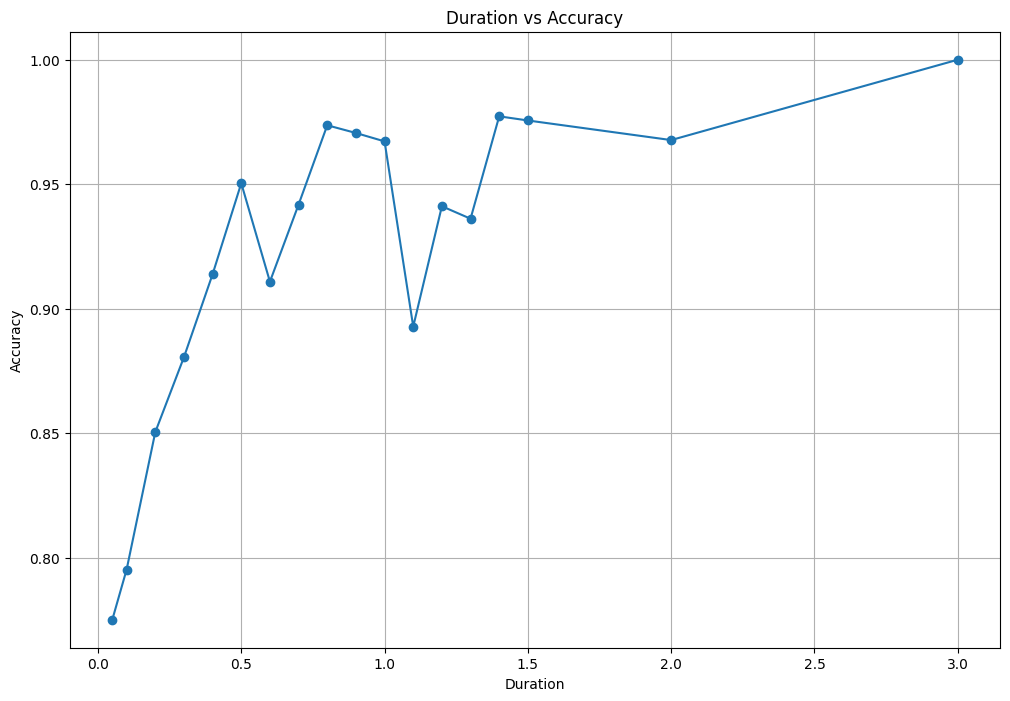

1.0


In [152]:
import matplotlib.pyplot as plt

# Initialize lists to store durations and accuracies
durations = []
accuracies = []

# Define a range of durations to try
duration_range = [0.05,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,2,3]

maxacc = 0

for duration in duration_range:
    epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)
    epochs.drop_bad()  # This will drop bad epochs
    num_epochs = len(epochs)
    
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.signal import welch

    data = epochs.get_data(copy=True)
    sfreq = epochs.info['sfreq']
    n_epochs, n_channels, n_time_points = data.shape

    

    for channel_idx in range(n_channels):
        freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
        
        avg_psd = np.mean(psd, axis=0)
        
        

    data = epochs.get_data(copy=True) 
    n_epochs, n_channels, n_time_points = data.shape
    plt.figure(figsize=(12, 8))

    for channel_idx in range(n_channels):
        channel_data = data[:, channel_idx, :].flatten()
        time_points = np.arange(n_time_points * n_epochs)
        


    
    import mne

    eeg_data = epochs.get_data()

    condition_ranges = {'lev1': (100/duration, 200/duration),
                        'lev2': (280/duration, 380/duration),
                        'lev3': (420/duration, 520/duration)}

    epochs_by_condition = {}
    selected_epochs = []

    for condition, (start_epoch, end_epoch) in condition_ranges.items():
        start_epoch = int(start_epoch)
        end_epoch = int(end_epoch)
        condition_epochs = epochs[start_epoch:end_epoch+1].copy()
        epochs_by_condition[condition] = condition_epochs
        selected_epochs.append(condition_epochs)

    selected_epochs = mne.concatenate_epochs(selected_epochs)

    for condition, epoch_data in epochs_by_condition.items():
        num_epochs = len(epoch_data)
        print(f"Number of epochs for {condition}: {num_epochs}")

    print(f"Total number of selected epochs: {len(selected_epochs)}")


    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")

    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    import pandas as pd
    import numpy as np
    from scipy.signal import welch



    def calculate_psd_features(epoch_data, sfreq):
        psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
        psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
        psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
        psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

        freq_min = 14
        freq_max = 30

        # Find the indices corresponding to the frequency range of interest
        idx_min = np.argmax(psd_frequencies > freq_min) - 1
        idx_max = np.argmax(psd_frequencies > freq_max)

        # Extract the PSD within the specified frequency range
        psd_values_alpha_band = psd_values[:, idx_min:idx_max]
        psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
        psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
        psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
        return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

    channel_names = epochs.ch_names
    sfreq = epochs.info['sfreq']  # Sampling frequency

    columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
    columns.append('condition')
    feature_df = pd.DataFrame(columns=columns)

    def append_epoch_data(epoch_array, condition_label):
        global feature_df
        for epoch in epoch_array:
            psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
            epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
            epoch_features = np.append(epoch_features, condition_label)
            epoch_df = pd.DataFrame([epoch_features], columns=columns)
            feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

    append_epoch_data(epochs_by_condition['lev1'], 'lev1')
    append_epoch_data(epochs_by_condition['lev2'], 'lev2')
    append_epoch_data(epochs_by_condition['lev3'], 'lev3')

    print("Shape of feature DataFrame:", feature_df.shape)
    print(feature_df.head())

    # Rename columns using a dictionary
    new_column_names = {
        'mean_psd_Fp1': 'mean_psd_Fp1',
        'mean_psd_Fp2': 'mean_psd_Fp2',
        'mean_psd_C3': 'mean_psd_C3',
        'mean_psd_C4': 'mean_psd_C4',
        'mean_psd_P7': 'mean_psd_P7',
        'mean_psd_P8': 'mean_psd_P8',
        'mean_psd_O1': 'mean_psd_O1',
        'mean_psd_O2': 'mean_psd_O2',
        'mean_psd_F7': 'mean_psd_F7',
        'mean_psd_F8': 'mean_psd_F8',
        'standarddev_psd_Fp1': 'stddev_psd_Fp1',
        'standarddev_psd_Fp2': 'stddev_psd_Fp2',
        'standarddev_psd_C3': 'stddev_psd_C3',
        'standarddev_psd_C4': 'stddev_psd_C4',
        'standarddev_psd_P7': 'stddev_psd_P7',
        'standarddev_psd_P8': 'stddev_psd_P8',
        'standarddev_psd_O1': 'stddev_psd_O1',
        'standarddev_psd_O2': 'stddev_psd_O2',
        'standarddev_psd_F7': 'stddev_psd_F7',
        'standarddev_psd_F8': 'stddev_psd_F8'
    }

    # Rename columns using the rename() method
    feature_df.rename(columns=new_column_names, inplace=True)
    # Train the classifier and calculate accuracy
    X = feature_df.drop(columns=['condition'])
    y = feature_df['condition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append duration and accuracy to lists
    durations.append(duration)
    accuracies.append(accuracy)
    maxacc = max(maxacc , accuracy)

# Plot duration vs accuracy
plt.plot(durations, accuracies, marker='o')
plt.xlabel('Duration')
plt.ylabel('Accuracy')
plt.title('Duration vs Accuracy')
plt.grid(True)
plt.show()

print(maxacc)